**The objective of this project is to analyze food delivery order patterns and identify key factors influencing delivery time.**

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/daily_food_delivery_orders[1].csv")

In [2]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 2600 non-null   int64  
 1   order_date               2600 non-null   object 
 2   customer_age             2600 non-null   int64  
 3   restaurant_type          2600 non-null   object 
 4   order_value              2600 non-null   float64
 5   delivery_distance_km     2600 non-null   float64
 6   delivery_time_minutes    2600 non-null   int64  
 7   payment_method           2600 non-null   object 
 8   delivery_partner_rating  2600 non-null   float64
 9   order_status             2600 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 203.3+ KB


,order_id,customer_age,order_value,delivery_distance_km,delivery_time_minutes,delivery_partner_rating
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1300.500000,41.492308,670.293873,7.886800,51.748462,3.749577
std,750.699674,13.977196,300.767326,4.211332,21.987540,0.721153
min,1.000000,18.000000,150.900000,0.500000,15.000000,2.500000
25%,650.750000,29.000000,406.402500,4.207500,32.000000,3.100000
50%,1300.500000,41.000000,667.580000,7.965000,51.000000,3.800000
75%,1950.250000,54.000000,927.480000,11.590000,70.000000,4.400000
max,2600.000000,65.000000,1199.780000,14.990000,90.000000,5.000000


In [3]:
df.isnull().sum()
df.drop_duplicates(inplace=True)

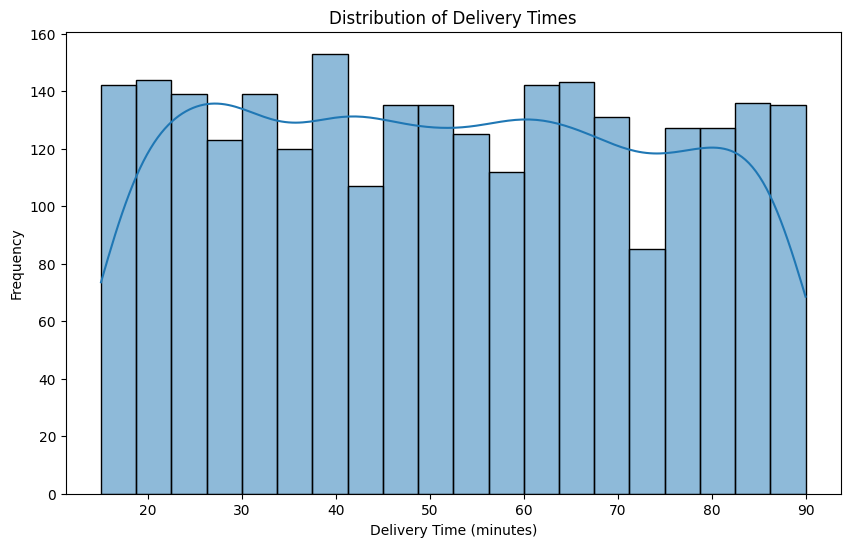

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time_minutes'], bins=20, kde=True)

plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

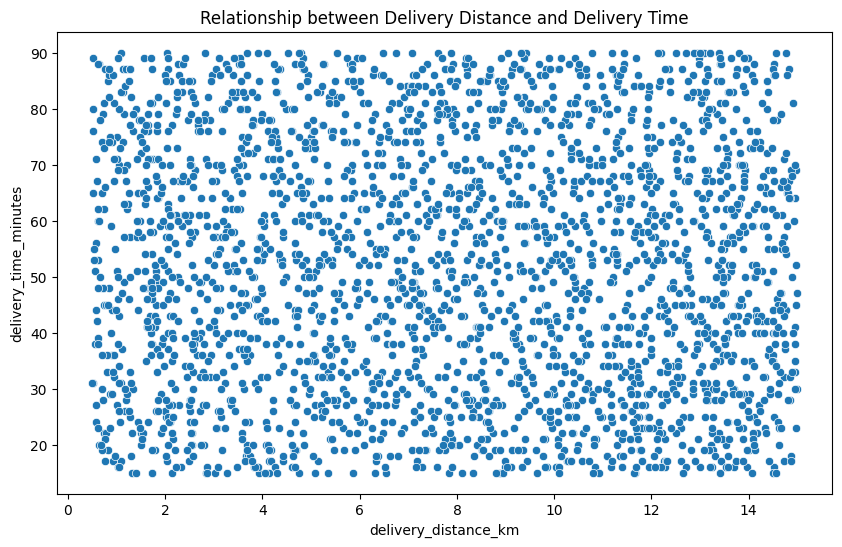

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_distance_km', y='delivery_time_minutes', data=df)

plt.title("Relationship between Delivery Distance and Delivery Time")
plt.show()

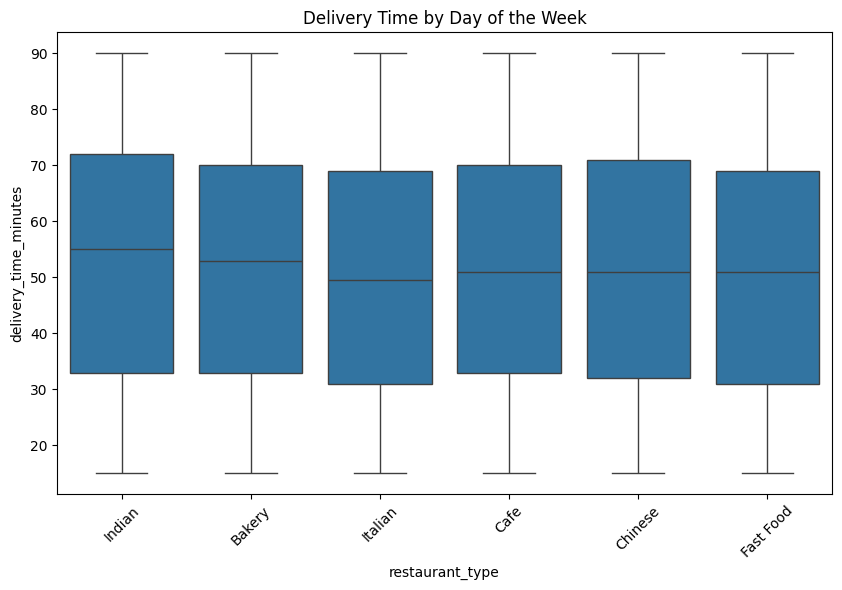

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='restaurant_type', y='delivery_time_minutes', data=df)
plt.xticks(rotation=45)
plt.title("Delivery Time by Day of the Week")
plt.show()

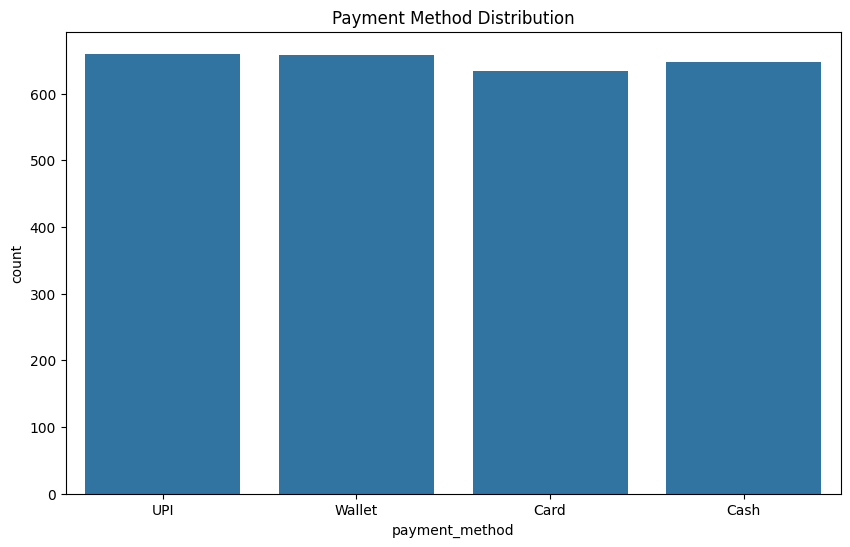

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_method', data=df)
plt.title("Payment Method Distribution")
plt.show()

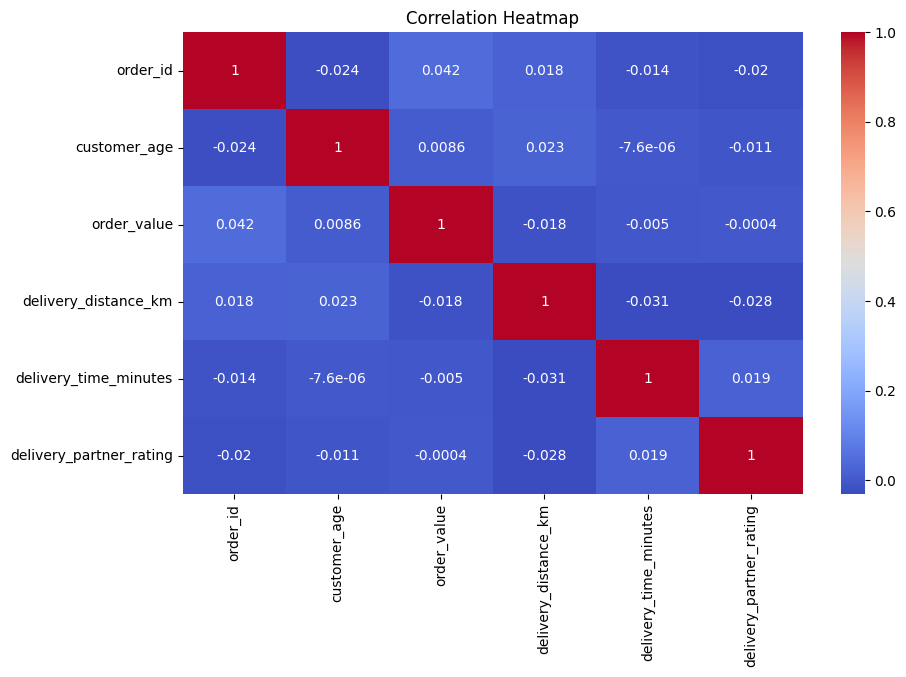

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

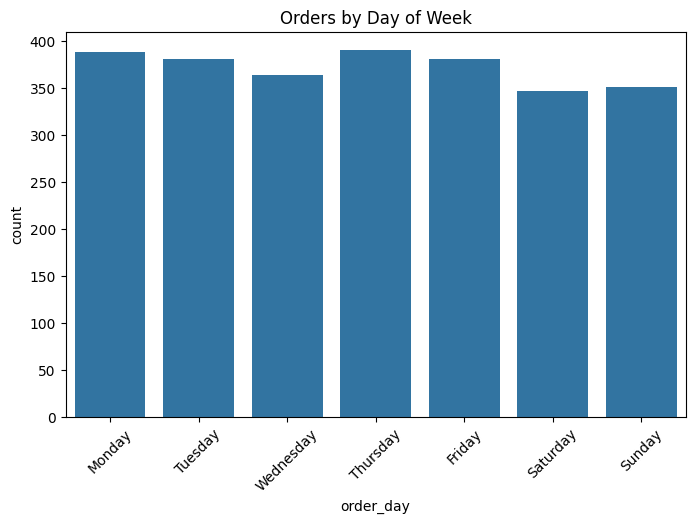

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_day'] = df['order_date'].dt.day_name()

plt.figure(figsize=(8,5))
sns.countplot(x='order_day', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xticks(rotation=45)
plt.title("Orders by Day of Week")
plt.show()

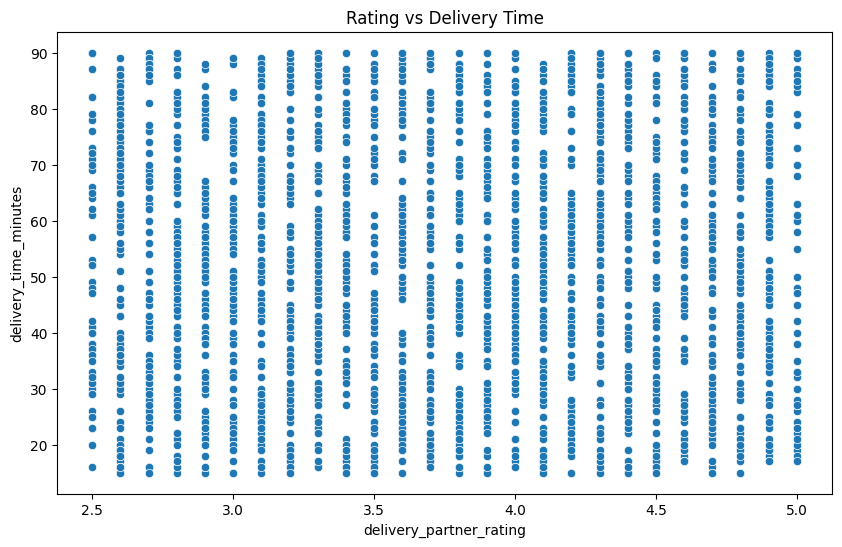

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delivery_partner_rating',y='delivery_time_minutes',data=df)
plt.title("Rating vs Delivery Time")
plt.show()

**Key Insights**

1. Weekend demand shows slight variation compared to weekdays.
2. Delivery time distribution is relatively uniform, indicating stable service duration.
3. Weak correlation between distance and delivery time suggests missing operational factors.
4. Payment methods are evenly distributed, showing balanced digital adoption.
5. Restaurant type shows moderate variation in median delivery time.
